### Logistic Regression Classifier, PR and ROC curves for changing threshold of decision function

In [1]:
# Read data from file
import pandas as pd
df=pd.read_csv('baseball.csv').dropna(subset=['OpponentOnBasePercentage', 'OpponentSluggingPercentage'])
df.tail()

,Team,League,Year,RunsScored,RunsAllowed,Wins,OnBasePercentage,SluggingPercentage,BattingAverage,Playoffs,RankSeason,RankPlayoffs,GamesPlayed,OpponentOnBasePercentage,OpponentSluggingPercentage
415,SFG,NL,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423
416,STL,NL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427
417,TBD,AL,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448
418,TEX,AL,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459
419,TOR,AL,1999,883,862,84,0.352,0.457,0.280,0,NaN,NaN,162,0.353,0.456


###### Predict whether a team will make to playoffs based on its and oppoments' statistics

In [2]:
from sklearn.model_selection import train_test_split
X=df[['OnBasePercentage','SluggingPercentage','BattingAverage','OpponentOnBasePercentage', 'OpponentSluggingPercentage']]
y=df['Playoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Train a logisitic regression classifier with default parameters using X_train and y_train.<br>
For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is playoffs).<br>
Looking at the precision recall curve, what is the recall when the precision is `0.75`?<br>
Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?<br>
Return (recall, true positive rate)<br>

In [3]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_train,y_train)
y_predicts=clf.predict(X_test)
y_scores=clf.decision_function(X_test)

<IPython.core.display.Javascript object>


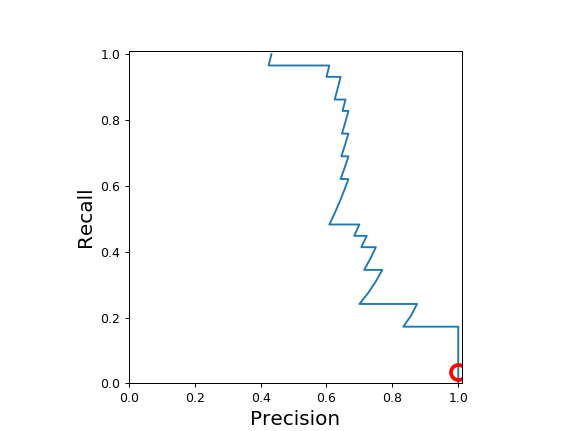

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [4]:
from sklearn.metrics import precision_recall_curve

%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


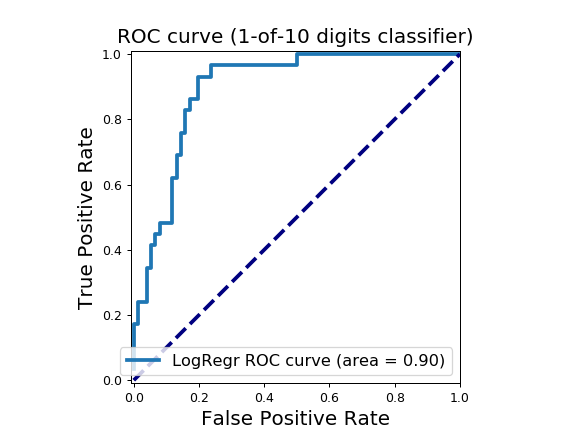

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [5]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()